<a href="https://colab.research.google.com/github/mykon23/AI-2020/blob/master/Activities/Activity7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Binary classification with Neural Networks

In [53]:
!wget -O Baseball.csv https://github.com/mykon23/AI-2020/blob/master/Data/Baseball.csv?raw=True

--2020-09-19 16:53:24--  https://github.com/mykon23/AI-2020/blob/master/Data/Baseball.csv?raw=True
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/mykon23/AI-2020/raw/master/Data/Baseball.csv [following]
--2020-09-19 16:53:25--  https://github.com/mykon23/AI-2020/raw/master/Data/Baseball.csv
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mykon23/AI-2020/master/Data/Baseball.csv [following]
--2020-09-19 16:53:25--  https://raw.githubusercontent.com/mykon23/AI-2020/master/Data/Baseball.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 20

In [54]:
import pandas as pd
data = pd.read_csv('Baseball.csv', delimiter=',')
data.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424


##Binary classification of whether an MLB enters Playoffs (Wildcard Era)

In [55]:
##Get the features of interest
x_features = [ 'RS', 'RA', 'W', 'OBP', 'SLG', 'BA' ]
##Binary value of whether a team made it to the playofss
y_output = [ 'Playoffs' ]

##Only get the data from teams after 1994 when the wildcard was introduced
##Prior to the wildcard game, only four or two teams made it to playoffs instead of 8
work_data = data[ data['Year'] > 1994 ]
work_data = work_data[ x_features + y_output ]
print(work_data)

      RS   RA   W    OBP    SLG     BA  Playoffs
0    734  688  81  0.328  0.418  0.259         0
1    700  600  94  0.320  0.389  0.247         1
2    712  705  93  0.311  0.417  0.247         1
3    734  806  69  0.315  0.415  0.260         0
4    613  759  61  0.302  0.378  0.240         0
..   ...  ...  ..    ...    ...    ...       ...
501  993  895  85  0.366  0.484  0.287         0
502  752  862  68  0.331  0.388  0.253         0
503  759  706  88  0.330  0.407  0.267         1
504  928  799  90  0.358  0.469  0.284         1
505  766  809  74  0.331  0.420  0.259         0

[506 rows x 7 columns]


In [56]:
##Convert the working data into numpy array
import numpy as np
work_data = work_data.to_numpy().astype(np.float64)

In [57]:
X = work_data[:, :-1]
Y = work_data[:, -1]

Standardization

In [58]:
##Standardization
mean = X.mean(axis = 0)
X -= mean
std = X.std(axis = 0)
X /= std

Determine Baseline Accuracy

In [59]:
##Baseline Accuracy will favor that non-playoff teams as only 8 teams enter per season
print(f'Baseline Accuracy: {Y.sum()/len(Y):2f}')

Baseline Accuracy: 0.272727


The baseline accuracy is low as it favors classifying a team as a non-playoff team.  This is due to only 8 teams entering the playoffs from 1994 to 2011 and 10 teams entering in 2012 with the introduction of the second wildcard per league.  Data is not balanced as only a fraction of the 30 teams become playoff contenders.

##Build a Neural Network 

In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense( 12, input_dim=len(X[0,:]), activation='relu'))
model.add(Dense( 4, activation='relu'))
model.add(Dense( 1, activation='sigmoid'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 12)                84        
_________________________________________________________________
dense_13 (Dense)             (None, 4)                 52        
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 5         
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________


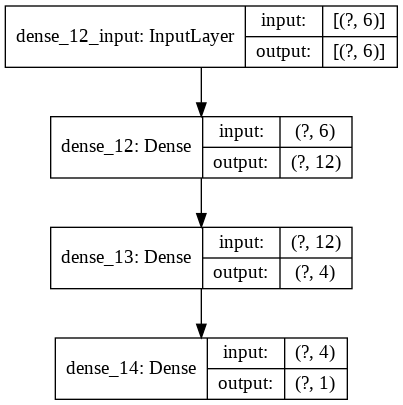

In [61]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_layer_names=True, show_shapes=True)

In [62]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.fit(X, Y, epochs = 512, verbose=0)

Evaluate Validation Set (Most Recent Teams Playoffs)

In [63]:
##Get the preditions for the most current year in the data for 30 teams
nn_prediction = model.predict(X)
print(f'{"Val":^8s}  {"Pred":^8s}')
for i in range(30):
  print(f'{Y[i]:2f}  {nn_prediction[i].T[0]:2f}')

  Val       Pred  
0.000000  0.001861
1.000000  0.993778
1.000000  0.996256
0.000000  0.000000
0.000000  0.000000
0.000000  0.000303
1.000000  0.999691
0.000000  0.000000
0.000000  0.000000
1.000000  0.730436
0.000000  0.000000
0.000000  0.000001
0.000000  0.105333
0.000000  0.104991
0.000000  0.000000
0.000000  0.000091
0.000000  0.000000
0.000000  0.000001
1.000000  0.990217
1.000000  0.995680
0.000000  0.000124
0.000000  0.000000
0.000000  0.000008
0.000000  0.000000
1.000000  0.975729
1.000000  0.374620
0.000000  0.024453
1.000000  0.678437
0.000000  0.000000
1.000000  0.999412


The model's predictions on the most recent year yield one misclassification.  The misclassification can be due the most recent season containing 10 playoff teams or an be an outlier in that its the best team within a poor performing division.

Evaluate Model Performance

In [64]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
nn_metrics = { 'accuracy': accuracy_score(Y, nn_prediction.round()),
              'precision': precision_score(Y, nn_prediction.round()),
              'recall': recall_score(Y, nn_prediction.round()),
              'f1_score': f1_score(Y, nn_prediction.round())
              }

for k in sorted(nn_metrics.keys()):
  print(f'{k:16s} {nn_metrics[k]:2f}')

accuracy         0.958498
f1_score         0.923077
precision        0.933333
recall           0.913043


The neural network yields an accuracy of 0.95 which is greater than baseline accuracy of 0.27 for playoff teams or 0.83 for non-playoff teams.  The model has a precision of 0.93 indicating that 0.93 of the predictions marked as playoff teams were correct.  The recall value of 0.91 indicates that the model was capable of classifying 0.91 of the actual playoff teams correctly.




##Build Logistic Regrssion Model

In [65]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(1, input_dim = len(X[0, :]), activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=['accuracy'])
model.fit(X, Y, epochs = 512, verbose = 0)

In [66]:
##Get the preditions for the most current year in the data for 30 teams
log_prediction = model.predict(X)
print(f'{"Val":^8s}  {"Pred":^8s}')
for i in range(30):
  print(f'{Y[i]:2f}  {log_prediction[i].T[0]:2f}')

  Val       Pred  
0.000000  0.061491
1.000000  0.828749
1.000000  0.545566
0.000000  0.000307
0.000000  0.000019
0.000000  0.152810
1.000000  0.917209
0.000000  0.000187
0.000000  0.000060
1.000000  0.432653
0.000000  0.000002
0.000000  0.001003
0.000000  0.426021
0.000000  0.206269
0.000000  0.000363
0.000000  0.083252
0.000000  0.000116
0.000000  0.002830
1.000000  0.922497
1.000000  0.790638
0.000000  0.033965
0.000000  0.012370
0.000000  0.005862
0.000000  0.002796
1.000000  0.755246
1.000000  0.520917
0.000000  0.645784
1.000000  0.762634
0.000000  0.001164
1.000000  0.955360


The model's predictions on the most recent year yield two misclassifications.

In [67]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
log_metrics = { 'accuracy': accuracy_score(Y, log_prediction.round()),
              'precision': precision_score(Y, log_prediction.round()),
              'recall': recall_score(Y, log_prediction.round()),
              'f1_score': f1_score(Y, log_prediction.round())
              }
              
for k in sorted(log_metrics.keys()):
  print(f'{k:16s} {log_metrics[k]:2f}')

accuracy         0.922925
f1_score         0.856089
precision        0.872180
recall           0.840580


The neural network yields an accuracy of 0.92 which is greater than baseline accuracy of 0.27 for playoff teams or 0.83 for non-playoff teams.  The precision is 0.87 indicating that only 0.87 of the teams marked as playoff teams are true playoff teams.  The recall value of 0.84 indicates that the model can only correctly identify 0.84 of the playoff teams.




##Evaluate Performance of Neural Network vs Logistic Regression

In [68]:
##Compare the validation results
print(f'{"Val":^8s} {"NN":^8s} {"Log":^8s}')
for i in range(30):
  print(f'{Y[i]:2f} {nn_prediction[i].T[0]:2f} {log_prediction[i].T[0]:2f}')

  Val       NN      Log   
0.000000 0.001861 0.061491
1.000000 0.993778 0.828749
1.000000 0.996256 0.545566
0.000000 0.000000 0.000307
0.000000 0.000000 0.000019
0.000000 0.000303 0.152810
1.000000 0.999691 0.917209
0.000000 0.000000 0.000187
0.000000 0.000000 0.000060
1.000000 0.730436 0.432653
0.000000 0.000000 0.000002
0.000000 0.000001 0.001003
0.000000 0.105333 0.426021
0.000000 0.104991 0.206269
0.000000 0.000000 0.000363
0.000000 0.000091 0.083252
0.000000 0.000000 0.000116
0.000000 0.000001 0.002830
1.000000 0.990217 0.922497
1.000000 0.995680 0.790638
0.000000 0.000124 0.033965
0.000000 0.000000 0.012370
0.000000 0.000008 0.005862
0.000000 0.000000 0.002796
1.000000 0.975729 0.755246
1.000000 0.374620 0.520917
0.000000 0.024453 0.645784
1.000000 0.678437 0.762634
0.000000 0.000000 0.001164
1.000000 0.999412 0.955360


The neural network was capable of predicting more teams as a playoff team than those of the logistic model.  The comparisons of the predictions indicate not only that the neural network classified them correctly, but also that the neural network is more confident in the classifications with the exception of a few outliers.  There is one team that neither the neural network nor the logistic model confidently predicts as a playoff team suggesting that the team is an outlier.

In [69]:
##Baseline Accuracy will favor that non-playoff teams as only 8 teams enter per season
print(f'Baseline Accuracy: {Y.sum()/len(Y):2f}')

##Display the metrics of interest
for k in sorted(nn_metrics.keys()):
  print(f'{"NN " + k:16s} {nn_metrics[k]:2f} {"Log " + k:16s} {log_metrics[k]:2f}')

Baseline Accuracy: 0.272727
NN accuracy      0.958498 Log accuracy     0.922925
NN f1_score      0.923077 Log f1_score     0.856089
NN precision     0.933333 Log precision    0.872180
NN recall        0.913043 Log recall       0.840580


The neural network outperformed the logistic model in terms of accuracy, f1 score, precision, and recall.  Both models exceeded baseline accuracy.  The neural network especially exceeds in terms of precision and recall.  The neural network network predictions are more reliable as its precision is 0.93 compared to that of the logistic model with value 0.87.  The predictions from the neural network are more likely to be true than those of the logistic model.  The neural network is also capable of identifying the true playoff teams than those of the logistic model with the neural network being able to identify 0.91 compared to the 0.84 of the logistic model. 